In [1]:
import pandas as pd

In [2]:
training_set=pd.read_csv("Training.csv")

In [3]:
len(training_set)

549

In [4]:
testing_set=pd.read_csv("Testing.csv")

In [5]:
len(testing_set)

42

In [6]:
training_set.head()

,skin_rash,nodal_skin_,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Temp,prognosis
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,106.0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,106.0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,106.0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,106.0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,106.0,0


<Figure size 640x480 with 0 Axes>

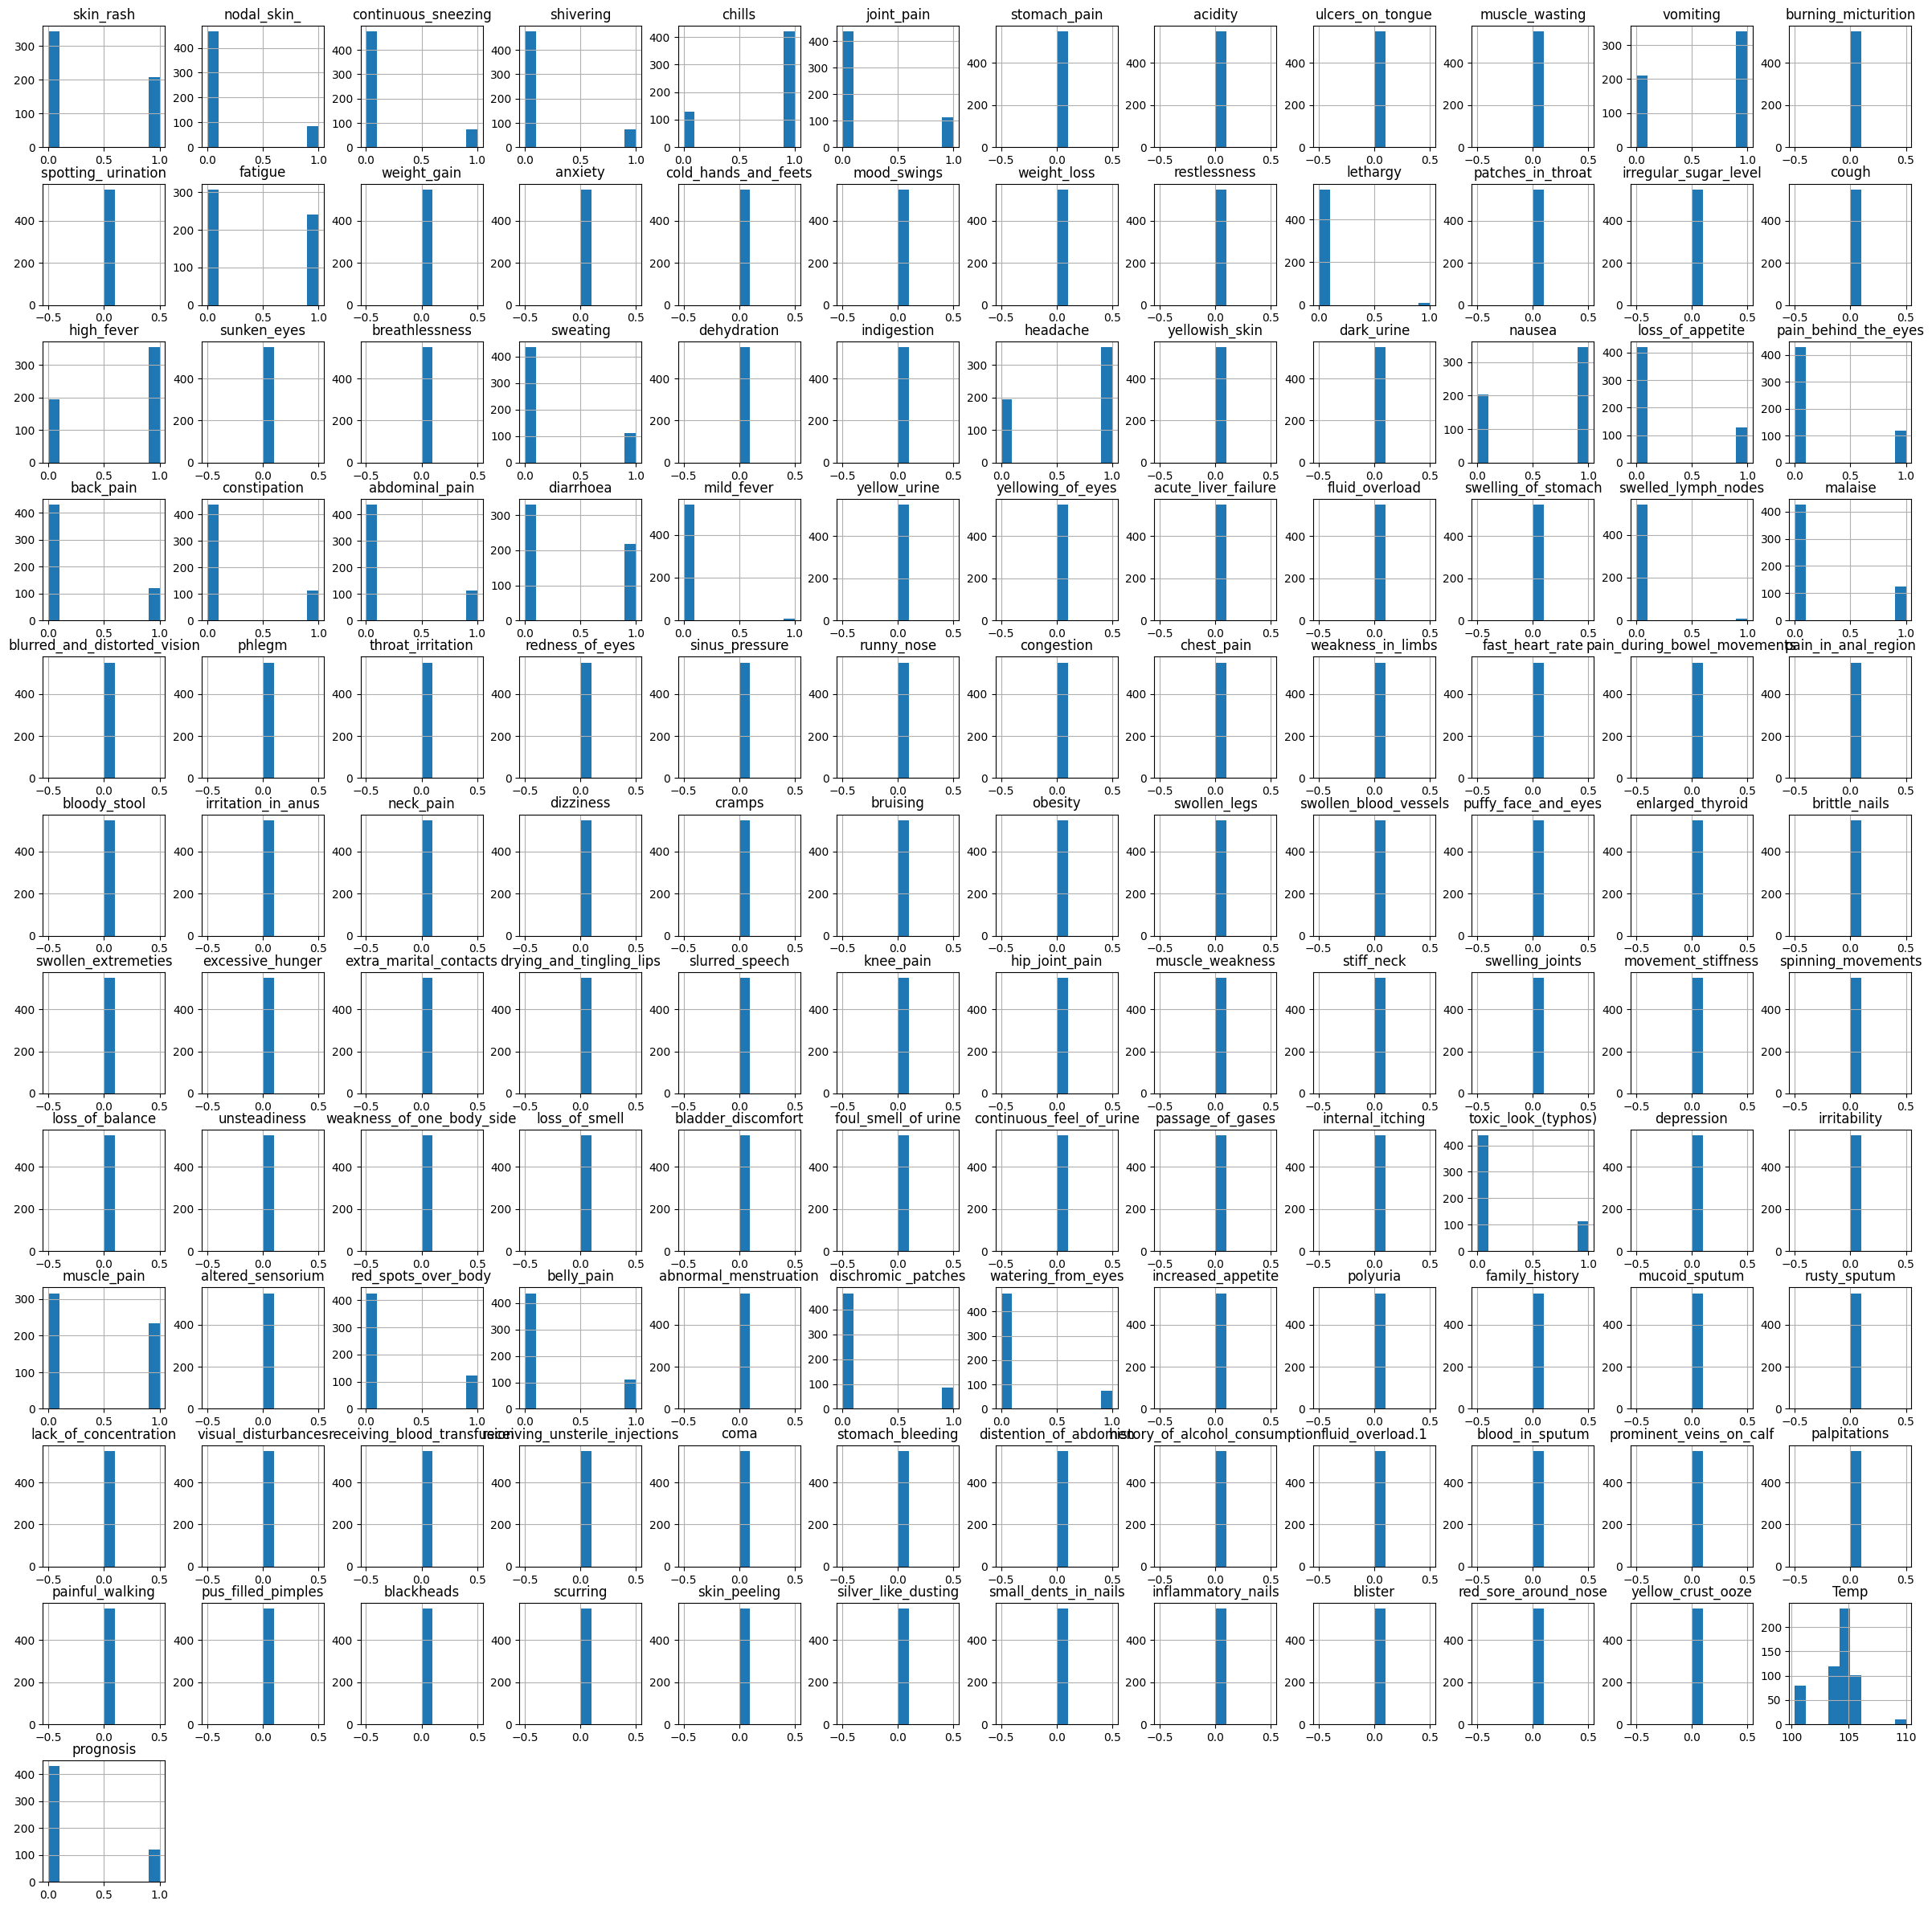

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots_adjust(left=0.1, right=5.9, bottom=.1, top=1.9, wspace=4.4, hspace=4.4)


training_set.hist(bins=10, figsize=(30,30))
plt.show()

In [8]:
print(training_set.dtypes)

skin_rash                 int64
nodal_skin_               int64
continuous_sneezing       int64
shivering                 int64
chills                    int64
                         ...   
blister                   int64
red_sore_around_nose      int64
yellow_crust_ooze         int64
Temp                    float64
prognosis                 int64
Length: 133, dtype: object


In [9]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Columns: 133 entries, skin_rash to prognosis
dtypes: float64(1), int64(132)
memory usage: 570.6 KB


In [10]:
training_set.isnull().sum()

skin_rash               0
nodal_skin_             0
continuous_sneezing     0
shivering               0
chills                  0
                       ..
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
Temp                    0
prognosis               0
Length: 133, dtype: int64

In [11]:
training_set["prognosis"].value_counts()

prognosis
0    429
1    120
Name: count, dtype: int64

## Explotary Data Analysis (EDA)

In [12]:
### in order to this predict our objective is to predict the dengue is infected or not (classify the dengue infected or not)
    ### what attributes are so important for doing so
    ### to  do that we have to  do corrrelational analysis between the prognosis (dependent variable) (y)and other independent variables(x)

In [13]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [14]:
corr_matrix = training_set.corr()

In [15]:
corr_matrix

,skin_rash,nodal_skin_,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Temp,prognosis
skin_rash,1.000000,0.421030,-0.307073,-0.307073,-0.441899,0.602421,NaN,NaN,NaN,NaN,-0.153271,NaN,NaN,0.190328,NaN,NaN,NaN,NaN,NaN,NaN,0.136343,NaN,NaN,NaN,-0.137241,NaN,NaN,-0.396066,NaN,NaN,-0.090120,NaN,NaN,-0.125080,0.650306,0.625250,0.625250,-0.393859,-0.393859,-0.633778,0.136343,NaN,NaN,NaN,NaN,NaN,0.136343,0.631379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.393859,NaN,NaN,0.153206,NaN,0.631379,-0.393859,NaN,0.421030,-0.307073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.291930,0.625250
nodal_skin_,0.421030,1.000000,-0.167758,-0.167758,-0.763042,-0.217581,NaN,NaN,NaN,NaN,-0.540012,NaN,NaN,-0.375964,NaN,NaN,NaN,NaN,NaN,NaN,-0.054870,NaN,NaN,NaN,-0.572661,NaN,NaN,-0.216376,NaN,NaN,-0.572661,NaN,NaN,-0.552723,-0.235550,-0.224789,-0.224789,-0.215170,-0.215170,-0.346241,-0.054870,NaN,NaN,NaN,NaN,NaN,-0.054870,-0.229578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.215170,NaN,NaN,-0.364962,NaN,-0.229578,-0.215170,NaN,0.831336,-0.167758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.364072,-0.224789
continuous_sneezing,-0.307073,-0.167758,1.000000,0.812575,0.069293,-0.202058,NaN,NaN,NaN,NaN,-0.501487,NaN,NaN,-0.349142,NaN,NaN,NaN,NaN,NaN,NaN,-0.050956,NaN,NaN,NaN,-0.531806,NaN,NaN,-0.200939,NaN,NaN,-0.531806,NaN,NaN,-0.513291,-0.218746,-0.208752,-0.208752,-0.199819,-0.199819,-0.321539,-0.050956,NaN,NaN,NaN,NaN,NaN,-0.050956,-0.213199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.19981

In [16]:
corr_matrix["prognosis"].sort_values(ascending=False)

back_pain                         1.000000
pain_behind_the_eyes              1.000000
prognosis                         1.000000
joint_pain                        0.967934
loss_of_appetite                  0.954315
malaise                           0.915901
red_spots_over_body               0.915901
skin_rash                         0.625250
muscle_pain                       0.562421
fatigue                           0.544613
nausea                            0.406694
headache                          0.392534
vomiting                          0.361855
high_fever                        0.337278
chills                            0.232391
lethargy                         -0.068279
mild_fever                       -0.068279
swelled_lymph_nodes              -0.068279
Temp                             -0.096828
continuous_sneezing              -0.208752
watering_from_eyes               -0.208752
shivering                        -0.208752
dischromic _patches              -0.224789
nodal_skin_

array([[<Axes: xlabel='prognosis', ylabel='prognosis'>,
        <Axes: xlabel='back_pain', ylabel='prognosis'>,
        <Axes: xlabel='pain_behind_the_eyes', ylabel='prognosis'>,
        <Axes: xlabel='joint_pain', ylabel='prognosis'>,
        <Axes: xlabel='loss_of_appetite', ylabel='prognosis'>],
       [<Axes: xlabel='prognosis', ylabel='back_pain'>,
        <Axes: xlabel='back_pain', ylabel='back_pain'>,
        <Axes: xlabel='pain_behind_the_eyes', ylabel='back_pain'>,
        <Axes: xlabel='joint_pain', ylabel='back_pain'>,
        <Axes: xlabel='loss_of_appetite', ylabel='back_pain'>],
       [<Axes: xlabel='prognosis', ylabel='pain_behind_the_eyes'>,
        <Axes: xlabel='back_pain', ylabel='pain_behind_the_eyes'>,
        <Axes: xlabel='pain_behind_the_eyes', ylabel='pain_behind_the_eyes'>,
        <Axes: xlabel='joint_pain', ylabel='pain_behind_the_eyes'>,
        <Axes: xlabel='loss_of_appetite', ylabel='pain_behind_the_eyes'>],
       [<Axes: xlabel='prognosis', ylabel='jo

<Figure size 640x480 with 0 Axes>

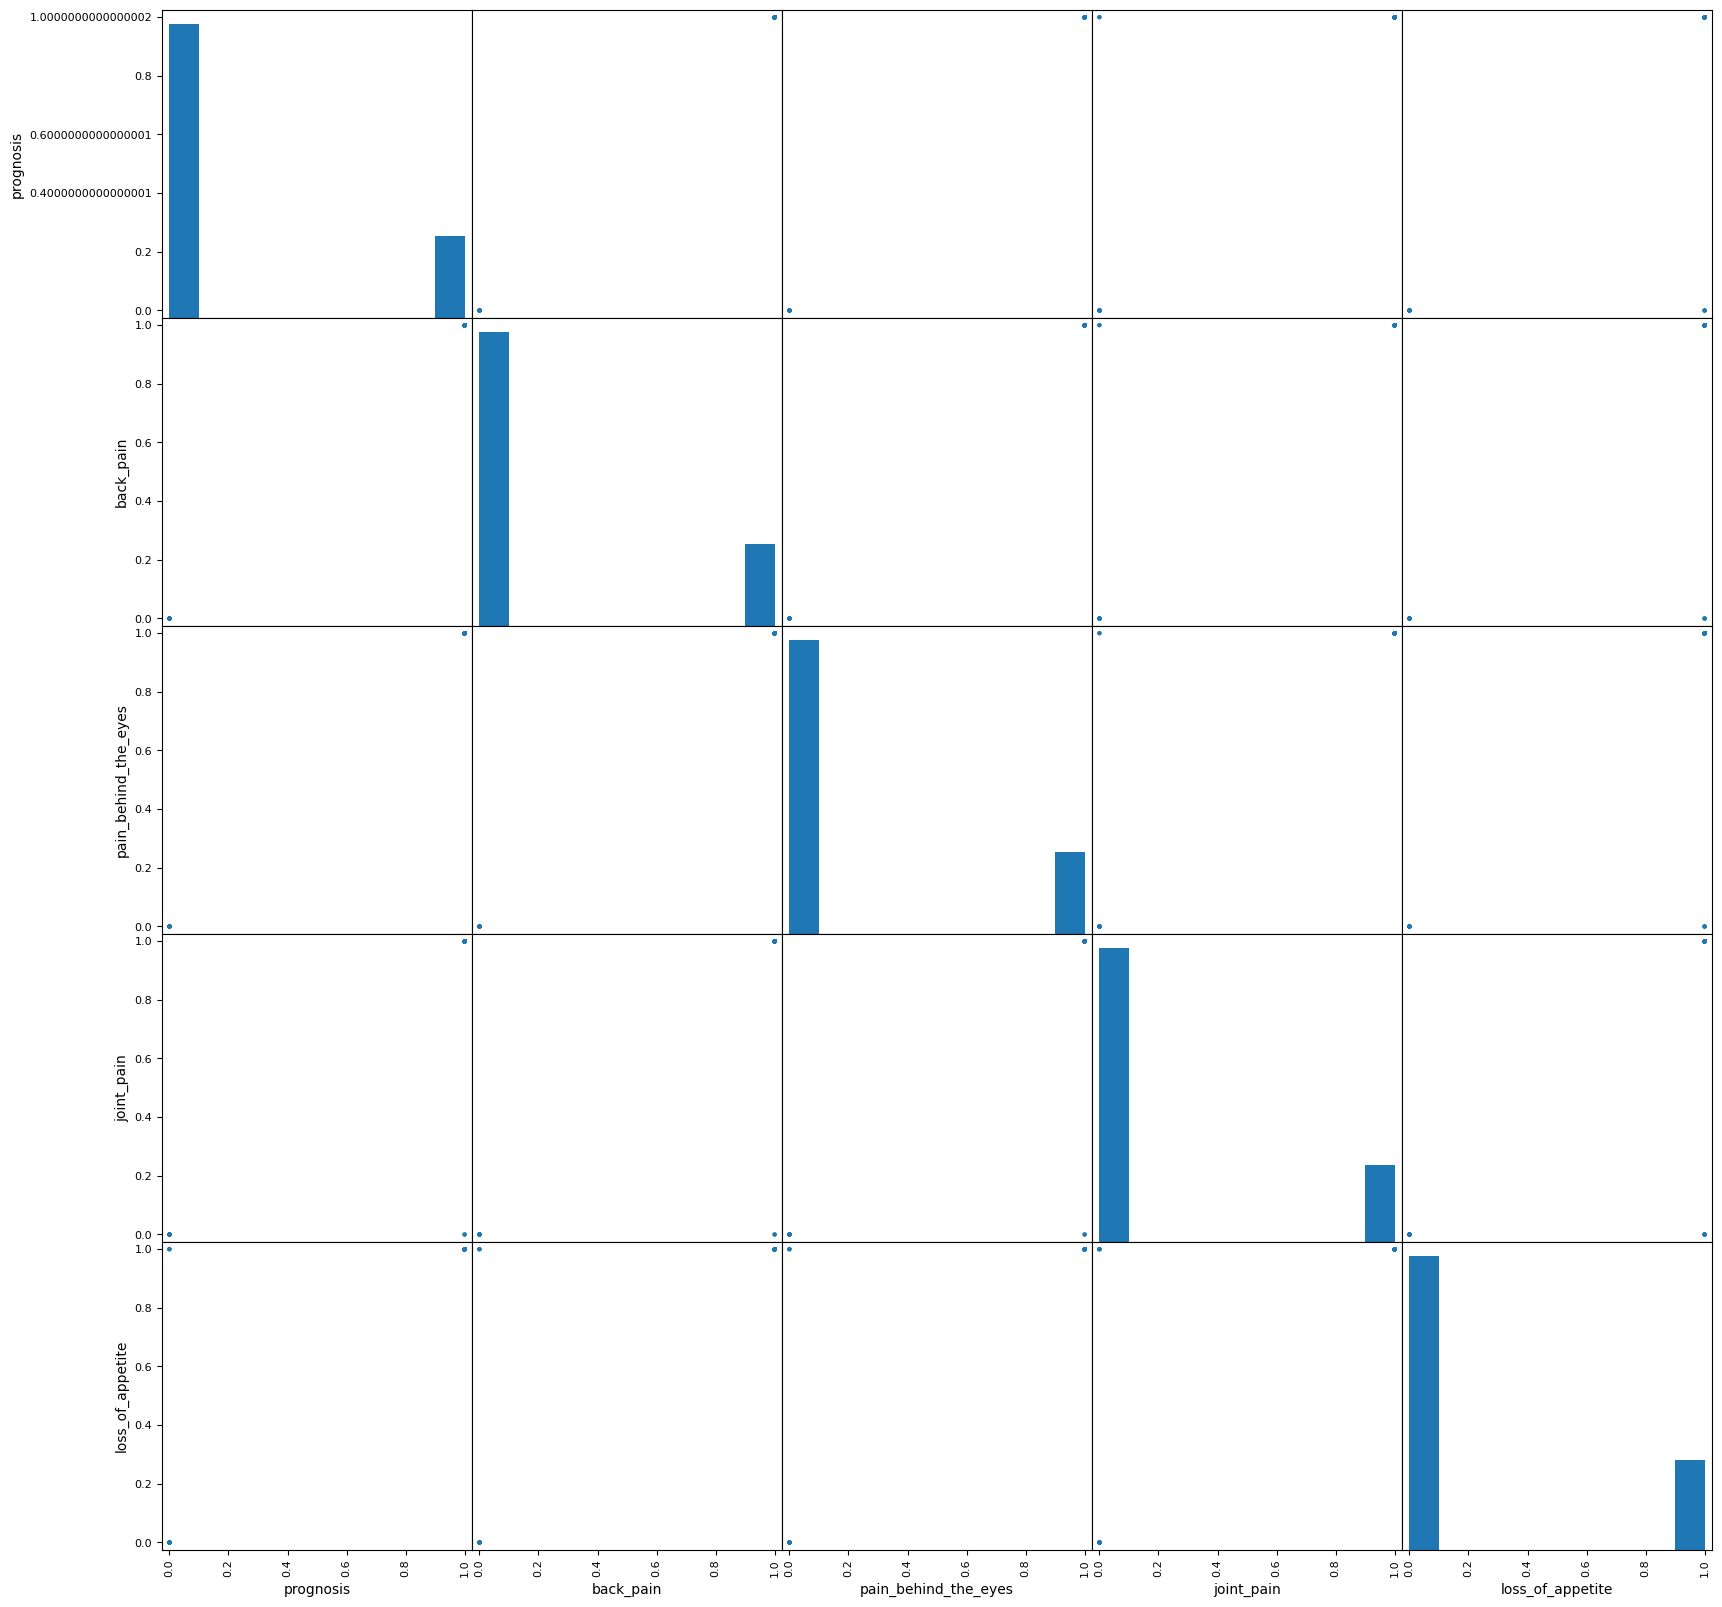

In [17]:
from pandas.plotting import scatter_matrix
plt.subplots_adjust(left=2.1, right=5.9, bottom=1.9, top=2.9, wspace=4.4, hspace=4.4)
attributes = ["prognosis","back_pain", "pain_behind_the_eyes","joint_pain","loss_of_appetite"]
scatter_matrix(training_set[attributes], figsize=(20,20))

array([[<Axes: xlabel='prognosis', ylabel='prognosis'>,
        <Axes: xlabel='malaise', ylabel='prognosis'>,
        <Axes: xlabel='red_spots_over_body', ylabel='prognosis'>,
        <Axes: xlabel='skin_rash', ylabel='prognosis'>,
        <Axes: xlabel='muscle_pain', ylabel='prognosis'>],
       [<Axes: xlabel='prognosis', ylabel='malaise'>,
        <Axes: xlabel='malaise', ylabel='malaise'>,
        <Axes: xlabel='red_spots_over_body', ylabel='malaise'>,
        <Axes: xlabel='skin_rash', ylabel='malaise'>,
        <Axes: xlabel='muscle_pain', ylabel='malaise'>],
       [<Axes: xlabel='prognosis', ylabel='red_spots_over_body'>,
        <Axes: xlabel='malaise', ylabel='red_spots_over_body'>,
        <Axes: xlabel='red_spots_over_body', ylabel='red_spots_over_body'>,
        <Axes: xlabel='skin_rash', ylabel='red_spots_over_body'>,
        <Axes: xlabel='muscle_pain', ylabel='red_spots_over_body'>],
       [<Axes: xlabel='prognosis', ylabel='skin_rash'>,
        <Axes: xlabel='malaise'

<Figure size 640x480 with 0 Axes>

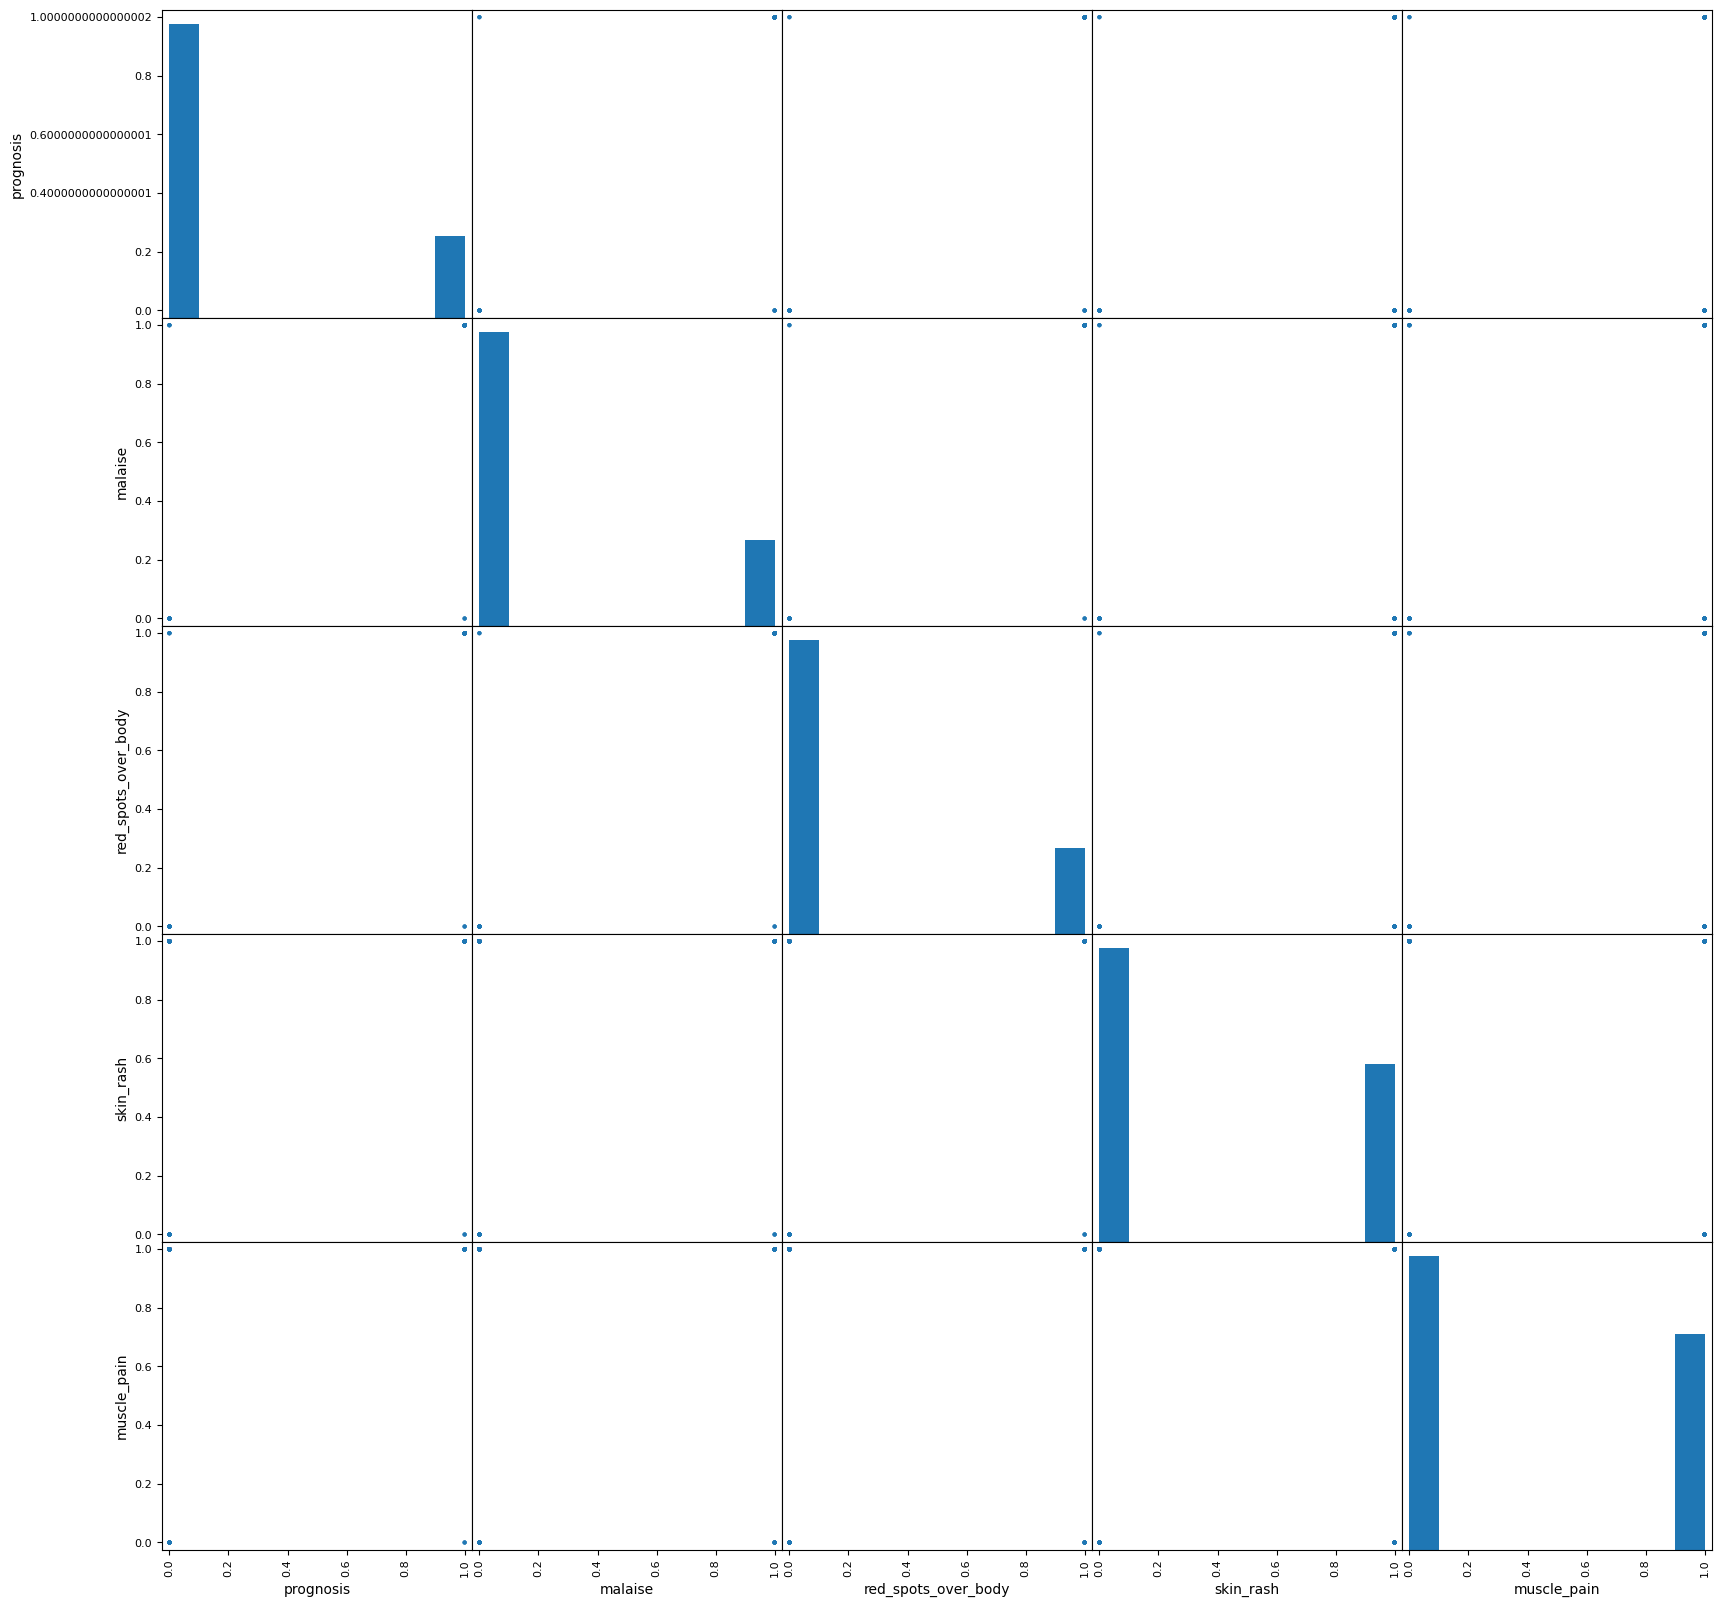

In [18]:
from pandas.plotting import scatter_matrix
plt.subplots_adjust(left=2.1, right=5.9, bottom=1.9, top=2.9, wspace=4.4, hspace=4.4)
attributes = ["prognosis","malaise","red_spots_over_body","skin_rash","muscle_pain",]
scatter_matrix(training_set[attributes], figsize=(20,20))

array([[<Axes: xlabel='prognosis', ylabel='prognosis'>,
        <Axes: xlabel='fatigue', ylabel='prognosis'>,
        <Axes: xlabel='nausea', ylabel='prognosis'>,
        <Axes: xlabel='headache', ylabel='prognosis'>,
        <Axes: xlabel='vomiting', ylabel='prognosis'>,
        <Axes: xlabel='high_fever', ylabel='prognosis'>],
       [<Axes: xlabel='prognosis', ylabel='fatigue'>,
        <Axes: xlabel='fatigue', ylabel='fatigue'>,
        <Axes: xlabel='nausea', ylabel='fatigue'>,
        <Axes: xlabel='headache', ylabel='fatigue'>,
        <Axes: xlabel='vomiting', ylabel='fatigue'>,
        <Axes: xlabel='high_fever', ylabel='fatigue'>],
       [<Axes: xlabel='prognosis', ylabel='nausea'>,
        <Axes: xlabel='fatigue', ylabel='nausea'>,
        <Axes: xlabel='nausea', ylabel='nausea'>,
        <Axes: xlabel='headache', ylabel='nausea'>,
        <Axes: xlabel='vomiting', ylabel='nausea'>,
        <Axes: xlabel='high_fever', ylabel='nausea'>],
       [<Axes: xlabel='prognosis', yl

<Figure size 640x480 with 0 Axes>

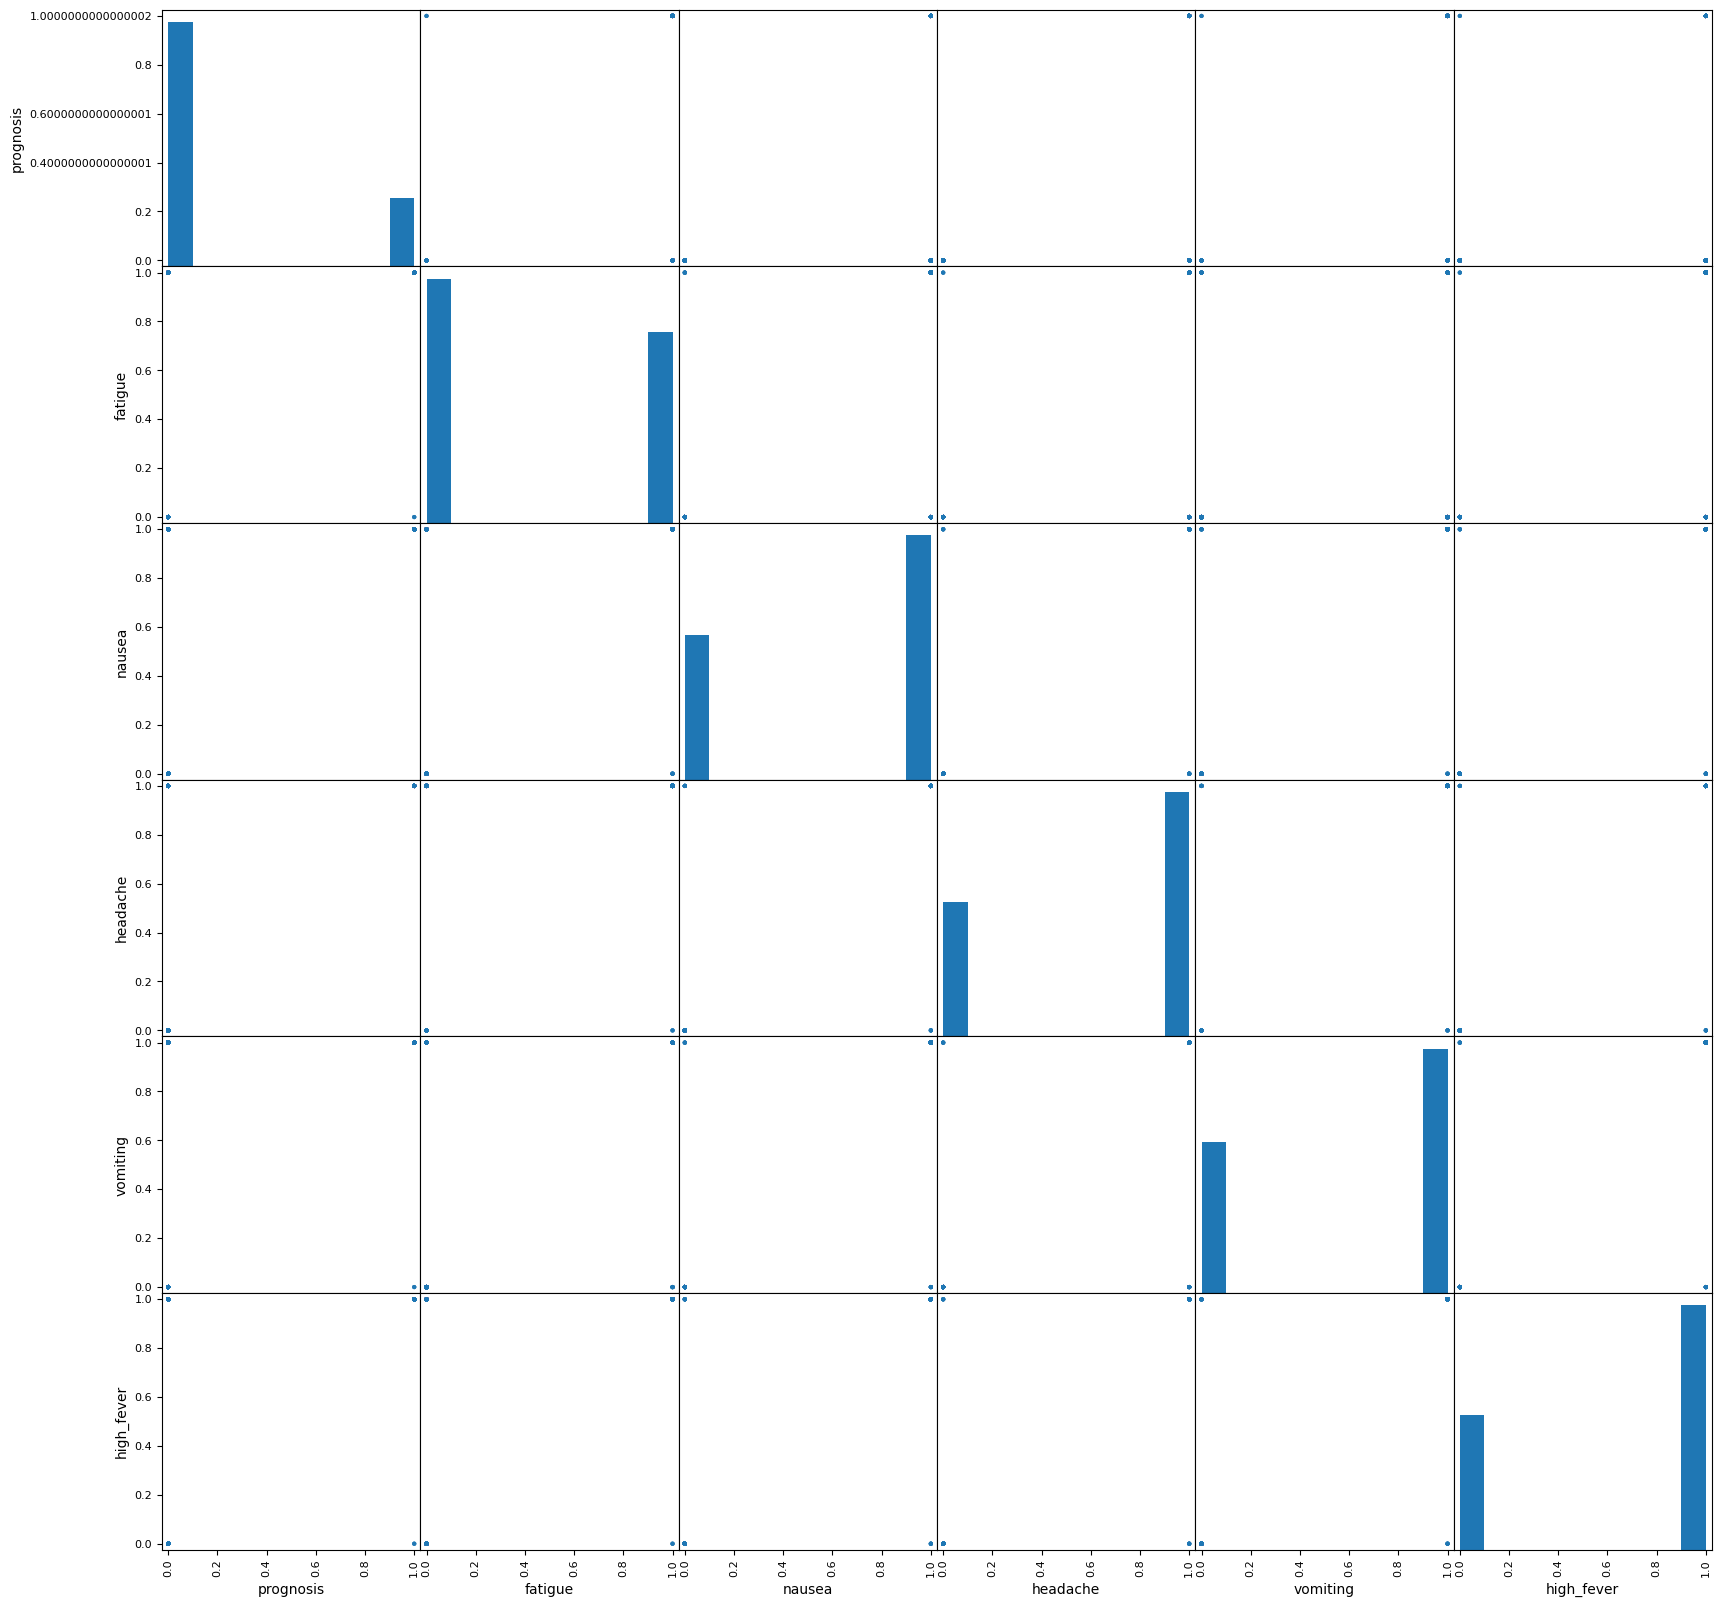

In [19]:
from pandas.plotting import scatter_matrix
plt.subplots_adjust(left=2.1, right=5.9, bottom=1.9, top=2.9, wspace=4.4, hspace=4.4)
attributes = ["prognosis","fatigue","nausea","headache","vomiting", "high_fever"]
scatter_matrix(training_set[attributes], figsize=(20,20))

array([[<Axes: xlabel='prognosis', ylabel='prognosis'>,
        <Axes: xlabel='toxic_look_(typhos)', ylabel='prognosis'>,
        <Axes: xlabel='abdominal_pain', ylabel='prognosis'>,
        <Axes: xlabel='belly_pain', ylabel='prognosis'>,
        <Axes: xlabel='constipation', ylabel='prognosis'>,
        <Axes: xlabel='sweating', ylabel='prognosis'>,
        <Axes: xlabel='diarrhoea', ylabel='prognosis'>],
       [<Axes: xlabel='prognosis', ylabel='toxic_look_(typhos)'>,
        <Axes: xlabel='toxic_look_(typhos)', ylabel='toxic_look_(typhos)'>,
        <Axes: xlabel='abdominal_pain', ylabel='toxic_look_(typhos)'>,
        <Axes: xlabel='belly_pain', ylabel='toxic_look_(typhos)'>,
        <Axes: xlabel='constipation', ylabel='toxic_look_(typhos)'>,
        <Axes: xlabel='sweating', ylabel='toxic_look_(typhos)'>,
        <Axes: xlabel='diarrhoea', ylabel='toxic_look_(typhos)'>],
       [<Axes: xlabel='prognosis', ylabel='abdominal_pain'>,
        <Axes: xlabel='toxic_look_(typhos)', yl

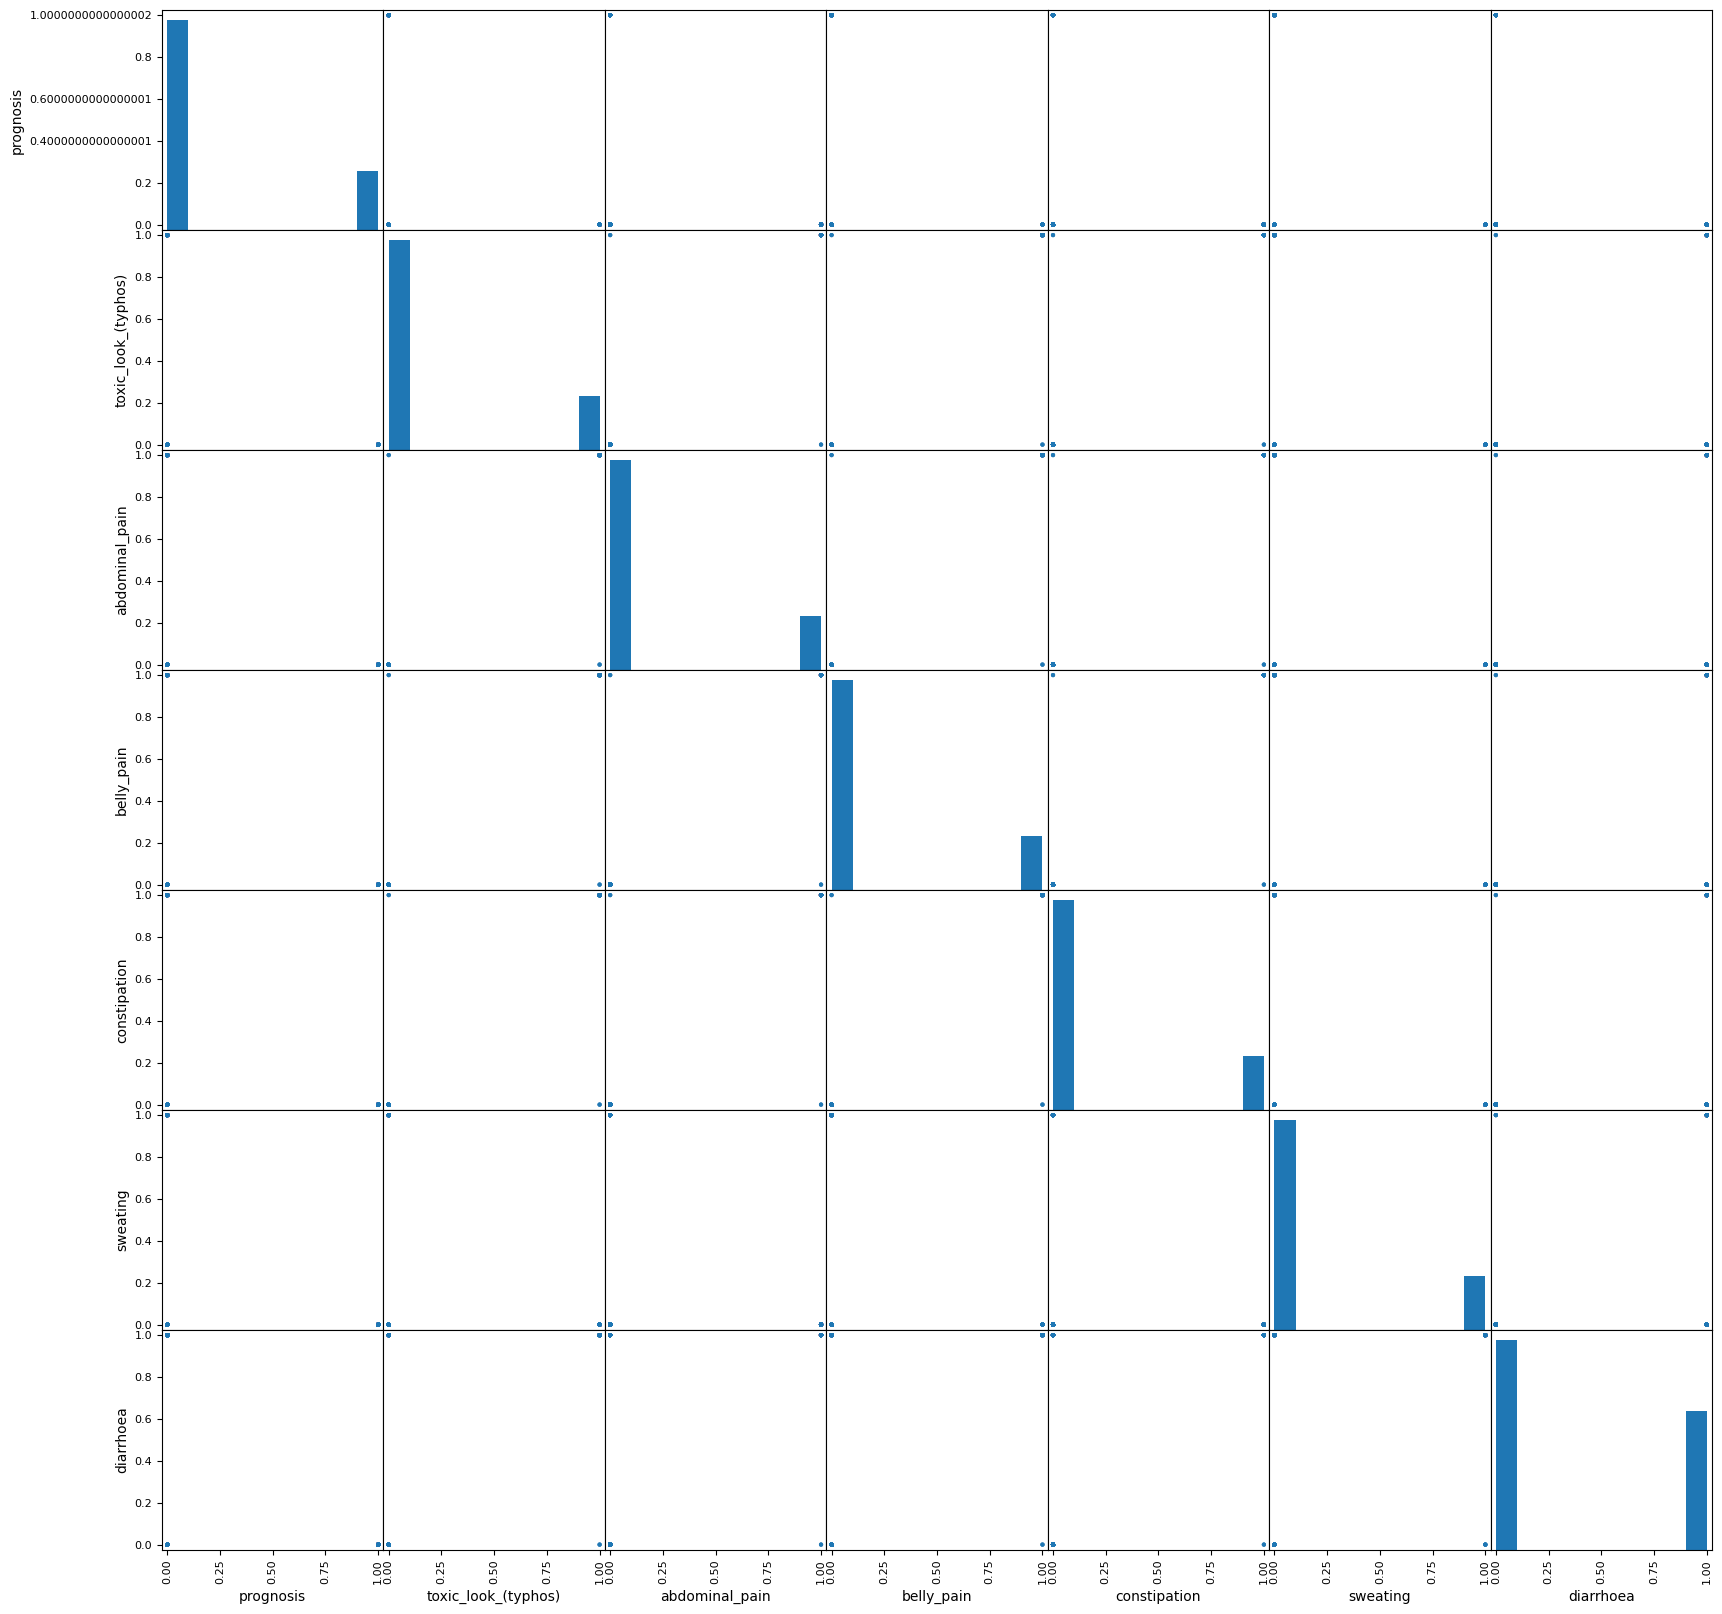

In [20]:
from pandas.plotting import scatter_matrix

attributes = ["prognosis","toxic_look_(typhos)","abdominal_pain","belly_pain", "constipation", "sweating","diarrhoea"]
scatter_matrix(training_set[attributes], figsize=(20,20))

back_pain                         1.000000
pain_behind_the_eyes              1.000000
prognosis                         1.000000
joint_pain                        0.967934
loss_of_appetite                  0.954315
malaise                           0.915901
red_spots_over_body               0.915901
skin_rash                         0.625250
muscle_pain                       0.562421
fatigue                           0.544613
nausea                            0.406694
headache                          0.392534
vomiting                          0.361855
high_fever                        0.337278
toxic_look_(typhos)              -0.267750
abdominal_pain                   -0.267750
belly_pain                       -0.267750
constipation                     -0.267750
sweating                         -0.269251
diarrhoea                        -0.430851

<Axes: xlabel='back_pain', ylabel='prognosis'>

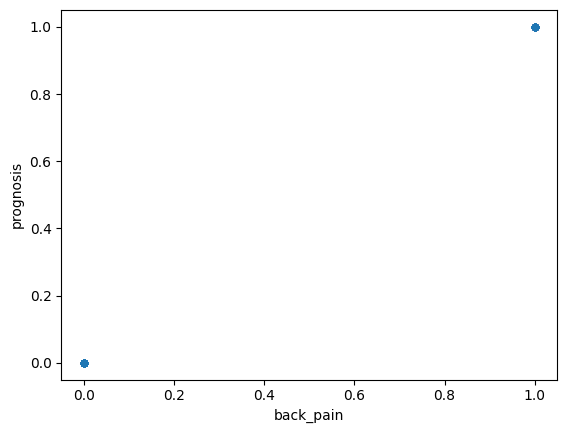

In [21]:
training_set.plot(kind="scatter", x="back_pain", y="prognosis", alpha=0.1)

<Axes: xlabel='pain_behind_the_eyes', ylabel='prognosis'>

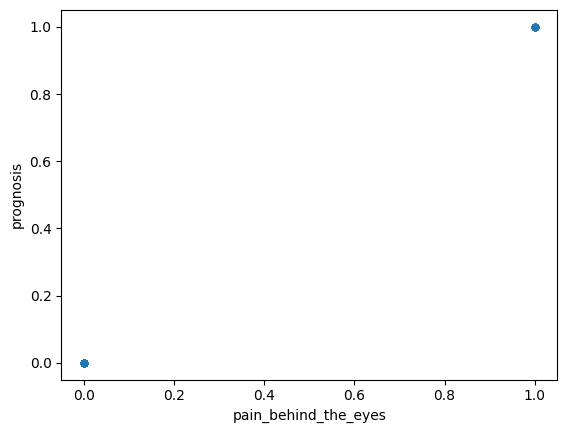

In [22]:
training_set.plot(kind="scatter", x="pain_behind_the_eyes", y="prognosis", alpha=0.1)

<Axes: xlabel='joint_pain', ylabel='prognosis'>

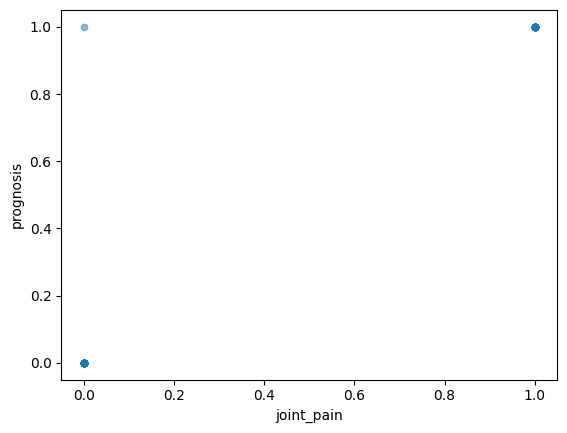

In [23]:
training_set.plot(kind="scatter", x="joint_pain", y="prognosis", alpha=0.1)

<Axes: xlabel='loss_of_appetite', ylabel='prognosis'>

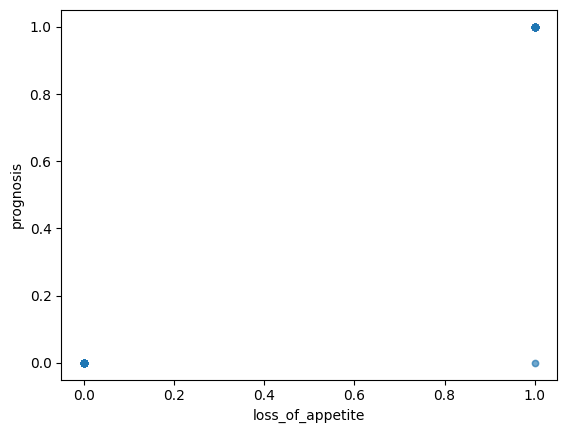

In [24]:
training_set.plot(kind="scatter", x="loss_of_appetite", y="prognosis", alpha=0.1)

<Axes: xlabel='malaise', ylabel='prognosis'>

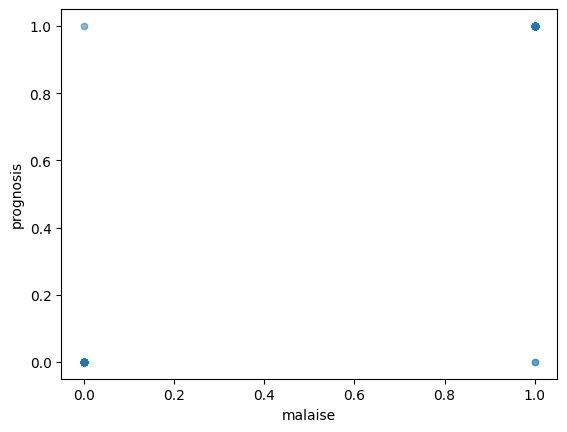

In [25]:
training_set.plot(kind="scatter", x="malaise", y="prognosis", alpha=0.1)

<Axes: xlabel='red_spots_over_body', ylabel='prognosis'>

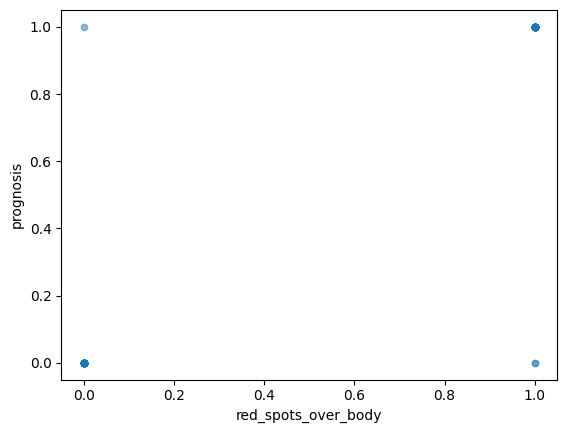

In [26]:
training_set.plot(kind="scatter", x="red_spots_over_body", y="prognosis", alpha=0.1)

<Axes: xlabel='skin_rash', ylabel='prognosis'>

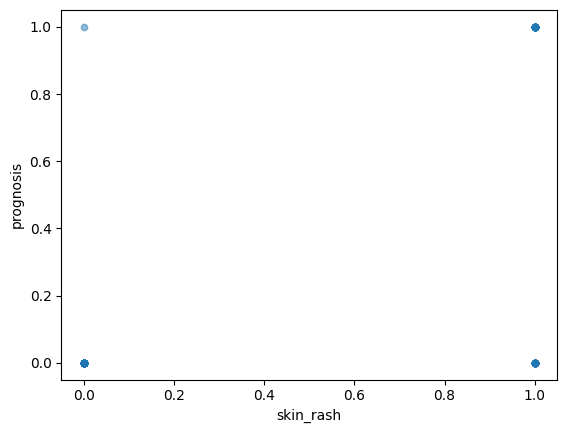

In [27]:
training_set.plot(kind="scatter", x="skin_rash", y="prognosis", alpha=0.1)

<Axes: xlabel='muscle_pain', ylabel='prognosis'>

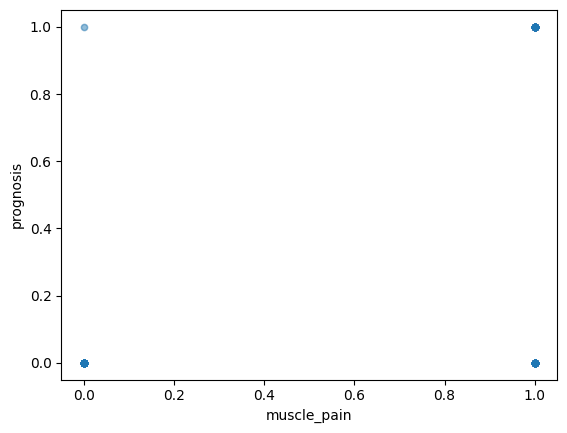

In [28]:
training_set.plot(kind="scatter", x="muscle_pain", y="prognosis", alpha=0.1)

<Axes: xlabel='fatigue', ylabel='prognosis'>

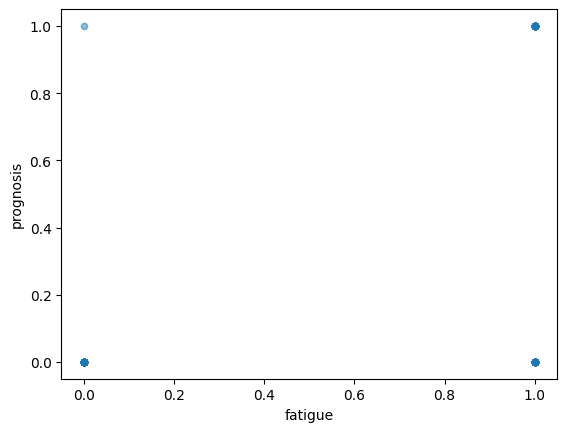

In [29]:
training_set.plot(kind="scatter", x="fatigue", y="prognosis", alpha=0.1)

<Axes: xlabel='nausea', ylabel='prognosis'>

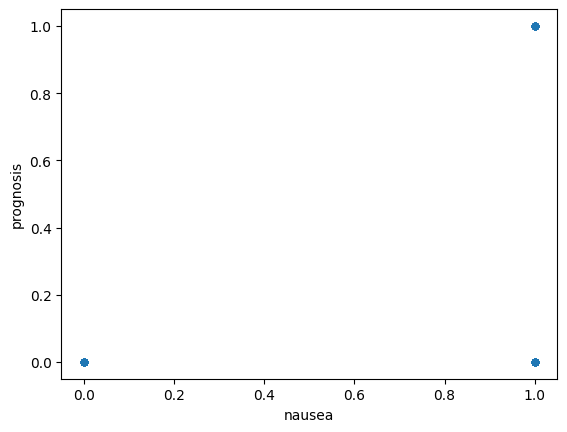

In [30]:
training_set.plot(kind="scatter", x="nausea", y="prognosis", alpha=0.1)

<Axes: xlabel='headache', ylabel='prognosis'>

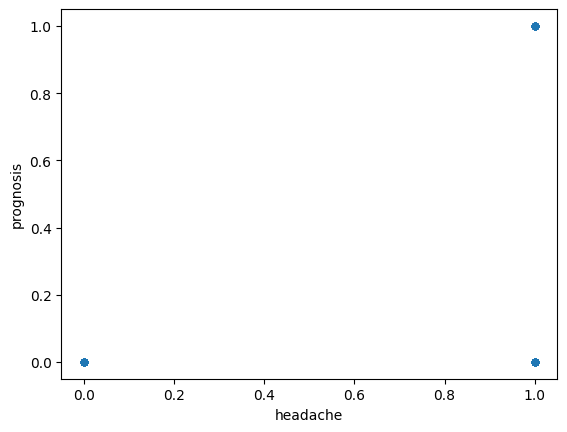

In [31]:
training_set.plot(kind="scatter", x="headache", y="prognosis", alpha=0.1)

vomiting                          0.361855
high_fever                        0.337278
toxic_look_(typhos)              -0.267750
abdominal_pain                   -0.267750
belly_pain                       -0.267750
constipation                     -0.267750
sweating                         -0.269251
diarrhoea                        -0.430851

<Axes: xlabel='vomiting', ylabel='prognosis'>

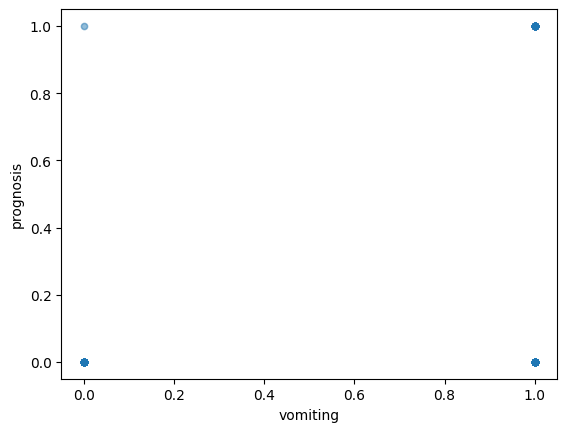

In [32]:
training_set.plot(kind="scatter", x="vomiting", y="prognosis", alpha=0.1)

<Axes: xlabel='high_fever', ylabel='prognosis'>

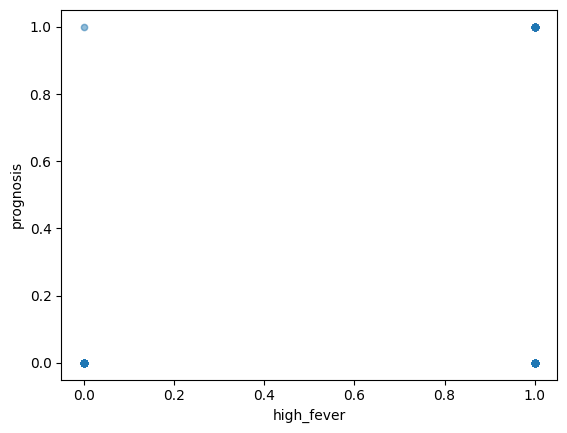

In [33]:
training_set.plot(kind="scatter", x="high_fever", y="prognosis", alpha=0.1)

<Axes: xlabel='toxic_look_(typhos)', ylabel='prognosis'>

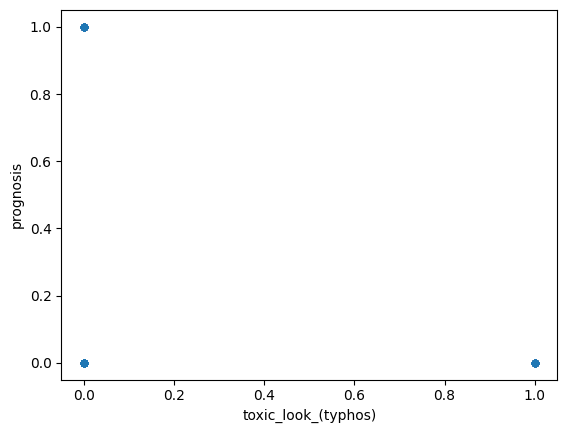

In [34]:
training_set.plot(kind="scatter", x="toxic_look_(typhos)", y="prognosis", alpha=0.1)

<Axes: xlabel='abdominal_pain', ylabel='prognosis'>

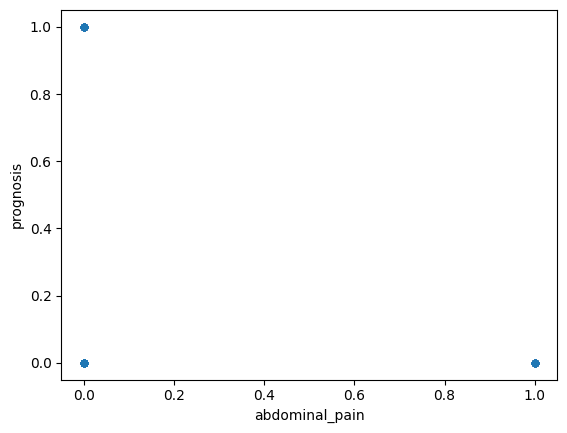

In [35]:
training_set.plot(kind="scatter", x="abdominal_pain", y="prognosis", alpha=0.1)

<Axes: xlabel='belly_pain', ylabel='prognosis'>

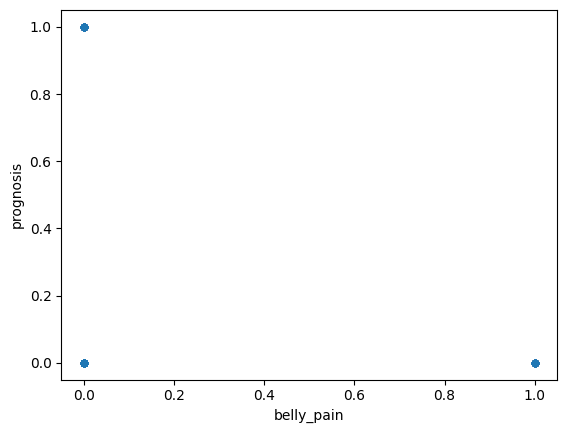

In [36]:
training_set.plot(kind="scatter", x="belly_pain", y="prognosis", alpha=0.1)

<Axes: xlabel='constipation', ylabel='prognosis'>

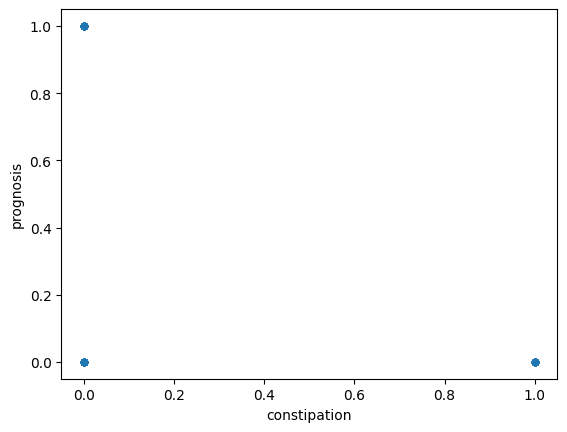

In [37]:
training_set.plot(kind="scatter", x="constipation", y="prognosis", alpha=0.1)

<Axes: xlabel='sweating', ylabel='prognosis'>

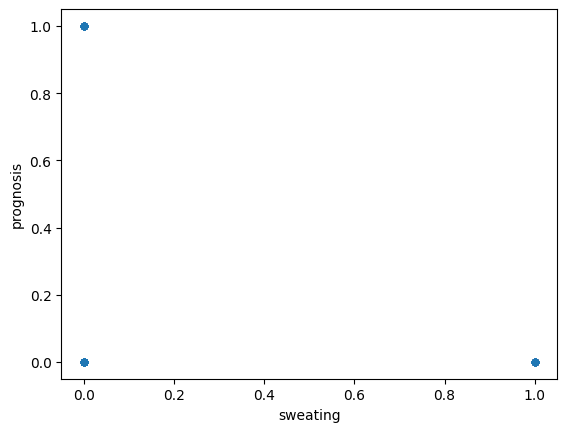

In [38]:
training_set.plot(kind="scatter", x="sweating", y="prognosis", alpha=0.1)

<Axes: xlabel='diarrhoea', ylabel='prognosis'>

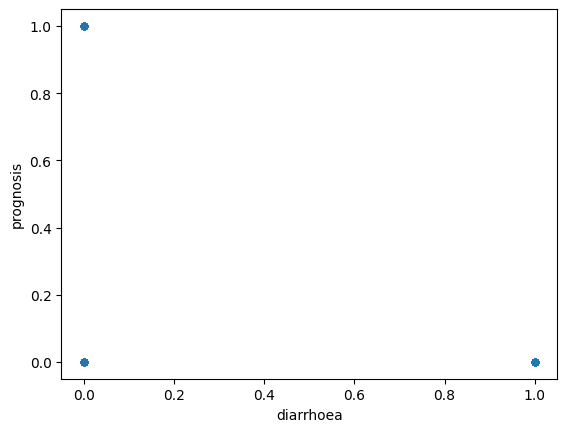

In [39]:
training_set.plot(kind="scatter", x="diarrhoea", y="prognosis", alpha=0.1)                                             

## Preparing the DataSet ML (Machine Learning) Models

In [40]:
training_set.head()

,skin_rash,nodal_skin_,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Temp,prognosis
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,106.0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,106.0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,106.0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,106.0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,106.0,0


In [41]:
## our objective is predict dengue. in that case prognosis variable is already available. so then we can use the supervised learning method
 ## seperate the label and rest of the data

In [42]:
training_set_data = training_set.drop("prognosis", axis=1)

training_set_data.head()

,skin_rash,nodal_skin_,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Temp
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,106.0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,106.0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,106.0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,106.0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,106.0


In [43]:
training_set_data_label = training_set["prognosis"].copy()
training_set_data_label

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88     1
89     1
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [44]:
## Data Cleaning

In [45]:
### check  any particular missing values are there

In [46]:
training_set_data.isnull().sum()

skin_rash                         0
nodal_skin_                       0
continuous_sneezing               0
shivering                         0
chills                            0
joint_pain                        0
stomach_pain                      0
acidity                           0
ulcers_on_tongue                  0
muscle_wasting                    0
vomiting                          0
burning_micturition               0
spotting_ urination               0
fatigue                           0
weight_gain                       0
anxiety                           0
cold_hands_and_feets              0
mood_swings                       0
weight_loss                       0
restlessness                      0
lethargy                          0
patches_in_throat                 0
irregular_sugar_level             0
cough                             0
high_fever                        0
sunken_eyes                       0
breathlessness                    0
sweating                    

In [47]:
### According to the above dataset missing values are not there then we dont need filling the missing values

In [48]:
## Feature Scalling
 #- ML algorthms doent work well when features are in the different scale
 #- So the feature scale is required
 # there are two main way is avaiable to do the scalling
    # min-max scaling
    # standardization

In [49]:
## min-max scalling

## normalized value = (x-min_value)/(max_value)

In [50]:
## standardization

 ## std_val = (x-mean)/standared deviation

In [51]:
# std_val always has o means
# std_val has unit variation

In [53]:
from  sklearn.preprocessing import StandardScaler

training_prepared_data = StandardScaler()
training_prepared_dataset = training_prepared_data.fit_transform(training_set_data)
training_prepared_dataset


array([[ 1.28536917,  2.35280987, -0.39470175, ...,  0.        ,
         0.        ,  0.86281796],
       [ 1.28536917,  2.35280987, -0.39470175, ...,  0.        ,
         0.        ,  0.86281796],
       [-0.77798661,  2.35280987, -0.39470175, ...,  0.        ,
         0.        ,  0.86281796],
       ...,
       [-0.77798661, -0.42502372, -0.39470175, ...,  0.        ,
         0.        ,  0.33986912],
       [ 1.28536917, -0.42502372, -0.39470175, ...,  0.        ,
         0.        , -0.18307972],
       [-0.77798661, -0.42502372, -0.39470175, ...,  0.        ,
         0.        ,  0.28757424]])

In [54]:
training_prepared_data_pd = pd.DataFrame(training_prepared_dataset, columns=training_set_data.columns)

In [101]:
training_prepared_data_pd.head(2)

,skin_rash,nodal_skin_,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Temp
0,1.285369,2.35281,-0.394702,-0.394702,-1.795293,-0.511927,0.0,0.0,0.0,0.0,-1.270545,0.0,0.0,-0.884572,0.0,0.0,0.0,0.0,0.0,0.0,-0.129099,0.0,0.0,0.0,-1.347362,0.0,0.0,-0.509092,0.0,0.0,-1.347362,0.0,0.0,-1.300452,-0.554205,-0.528886,-0.528886,-0.506254,-0.506254,-0.814639,-0.129099,0.0,0.0,0.0,0.0,0.0,-0.129099,-0.540152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.506254,0.0,0.0,-0.858686,0.0,-0.540152,-0.506254,0.0,2.35281,-0.394702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.862818
1,1.285369,2.35281,-0.394702,-0.394702,-1.795293,-0.511927,0.0,0.0,0.0,0.0,-1.270545,0.0,0.0,-0.884572,0.0,0.0,0.0,0.0,0.0,0.0,-0.129099,0.0,0.0,0.0,-1.347362,0.0,0.0,-0.509092,0.0,0.0,-1.347362,0.0,0.0,-1.300452,-0.554205,-0.528886,-0.528886,-0.506254,-0.506254,-0.814639,-0.129099,0.0,0.0,0.0,0.0,0.0,-0.129099,-0.540152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.506254,0.0,0.0,-0.858686,0.0,-0.540152,-0.506254,0.0,2.35281,-0.394702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.862818


In [139]:
from sklearn.model_selection import train_test_split


label= training_set_data_label.copy()

# Splitting train set into  the trainning and validation set
X_train, X_test, y_train, y_test = train_test_split(training_prepared_data_pd, label, test_size = 0.2, random_state=42)

In [140]:
# Import models
from sklearn.tree import DecisionTreeClassifier
Dt_clf = DecisionTreeClassifier(random_state=42)
Dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [141]:
from sklearn.metrics import accuracy_score
Dt_value_predictions = Dt_clf.predict(X_test)
Dt_value_accuracy = accuracy_score(y_test, Dt_value_predictions)
print(f"\nValidation Accuracy: {Dt_value_accuracy:.4f}")


Validation Accuracy: 1.0000


In [154]:
# Performance Mesure Of Your Model

In [142]:
mse_Of_Dt = mean_squared_error(y_test, Dt_value_predictions)
print(f"Mean Squared Error (MSE): {mse_Of_Dt:.4f}")

Mean Squared Error (MSE): 0.0000


In [144]:
from sklearn.ensemble import RandomForestClassifier
Rf_clf = RandomForestClassifier(random_state=42)
Rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [145]:
Rf_value_predictions = Rf_clf.predict(X_test)
Rf_value_accuracy = accuracy_score(y_test, Rf_value_predictions)
print(f"\nValidation Accuracy: {Rf_value_accuracy:.4f}")


Validation Accuracy: 1.0000


In [153]:
# Performance Mesure Of Your Model

In [146]:
mse_Of_Rf = mean_squared_error(y_test, Rf_value_predictions)
print(f"Mean Squared Error (MSE): {mse_Of_Rf:.4f}")

Mean Squared Error (MSE): 0.0000


In [148]:
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression(random_state=42)
LR_clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [149]:
Lr_value_predictions = LR_clf.predict(X_test)
Lr_value_accuracy = accuracy_score(y_test, Lr_value_predictions)
print(f"\nValidation Accuracy: {Lr_value_accuracy:.4f}")


Validation Accuracy: 1.0000


In [152]:
# Performance Mesure Of Your Model

In [150]:
mse_Of_Lr = mean_squared_error(y_test, Lr_value_predictions)
print(f"Mean Squared Error (MSE): {mse_Of_Lr:.4f}")

Mean Squared Error (MSE): 0.0000


## Handle the overfitting issue

In [151]:
#corr_matrix["prognosis"].sort_values(ascending=False)

In [94]:
#some_data = training_set_data
#some_labels = training_set_data_label
#some_prepared_data =training_prepared_data.transform(some_data)
#training_data_set_prediction = dt_clf.predict(some_prepared_data)


In [95]:
#print("Predictions: ",training_data_set_prediction)

In [96]:
#print("Labels: ",list(some_labels))

# Performance Mesure Of Your Model

In [98]:
#import numpy as np
#from sklearn.metrics import mean_squared_error

In [99]:
#Dt_mse = mean_squared_error(some_labels, training_data_set_prediction)
#Dt_rmse = np.sqrt(Dt_mse)
#Dt_rmse